# Master in Science in Data Analytics for Business - CA2

## Statistic for Data Analytics
 
**Student:** Wendy Paola Espinoza Potoy  
**ID:** 2021133

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from empiricaldist import Pmf, Cdf
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings("ignore")

# Passenger Journeys by Public Transport Dublin Ireland dataset

In [2]:
#Add the dataset to analysis data
#Add list with variables to missing values
#Define data type of the column "VALUE" as fload to avoid future issues
# Read the CSV file into a DataFrame

missing_value_formats = ["n.a.","?","NA","n/a", "na", "-"]
passenger_journeys = pd.read_csv("passenger_journey.csv" , na_values = missing_value_formats,  dtype={'VALUE': float})

In [3]:
#Check the 5 first rows of the dataset
passenger_journeys.head()

,Statistic Label,Week,Mode of Transport,UNIT,VALUE
0,Passenger Journeys,2019 Week 01,Dublin Metro Bus,Number,1987891.0
1,Passenger Journeys,2019 Week 01,"Bus, excluding Dublin Metro",Number,497598.0
2,Passenger Journeys,2019 Week 01,Rail,Number,NaN
3,Passenger Journeys,2019 Week 01,"All public transport, excluding LUAS",Number,2485489.0
4,Passenger Journeys,2019 Week 02,Dublin Metro Bus,Number,2709579.0


# Exploratory Data Analysis

In [4]:
#Check shape of the data in this case dataset has 1040 rows and 5 columns
passenger_journeys.shape

(1040, 5)

In [5]:
#Check information general of the dataset (data types, range of index, information of the columns and the memory used)
passenger_journeys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Statistic Label    1040 non-null   object 
 1   Week               1040 non-null   object 
 2   Mode of Transport  1040 non-null   object 
 3   UNIT               1040 non-null   object 
 4   VALUE              976 non-null    float64
dtypes: float64(1), object(4)
memory usage: 40.8+ KB


In [6]:
#Check the measures of central tendency and measures of dispersion 
passenger_journeys.describe()

,VALUE
count,9.760000e+02
mean,1.755135e+06
std,1.435038e+06
min,2.323100e+04
25%,6.167142e+05
50%,9.525170e+05
75%,2.992955e+06
max,5.488658e+06


## Cleaning the data

Text(0.5, 1.0, 'Feature Statistics')

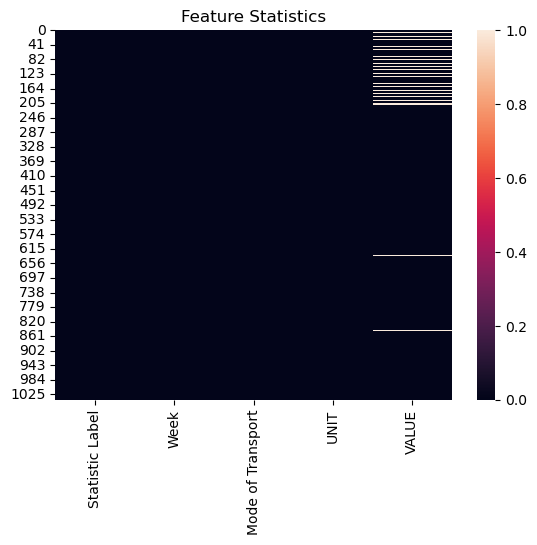

In [7]:
#This heatmap will show a visual representation of the missing value in the dataset
#It is posible to observe there is only one column with missing values = VALUE 
sns.heatmap(passenger_journeys.isnull())
plt.title("Feature Statistics")

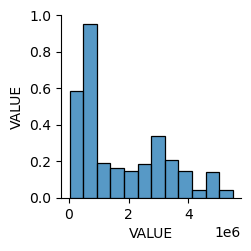

In [8]:
#Using a pairplot to check correlation

sns.pairplot(passenger_journeys)

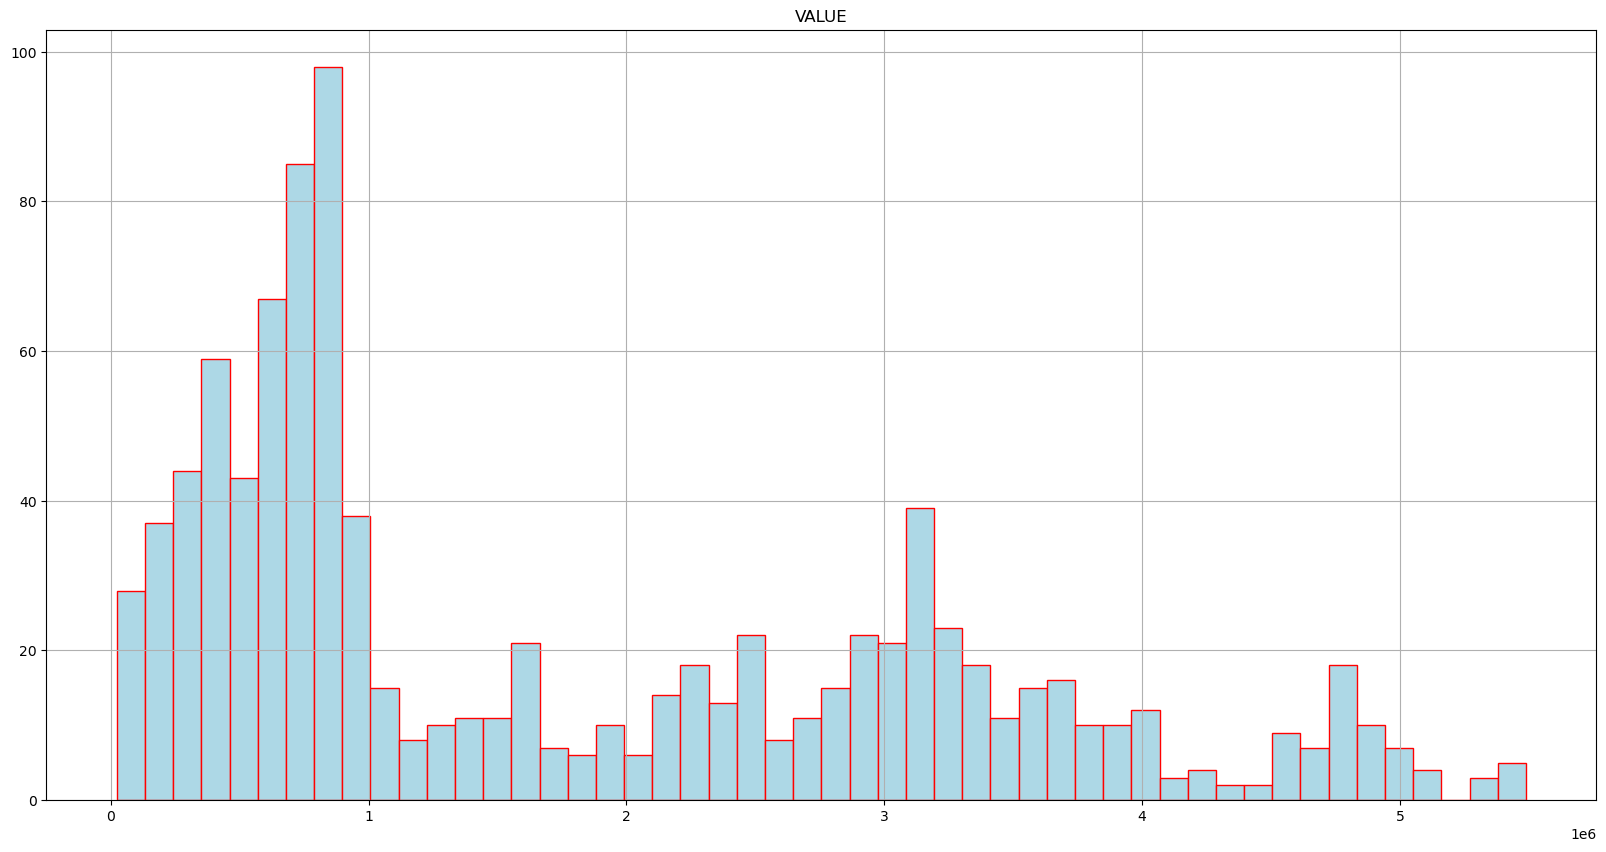

In [9]:
#plt.style.use('seaborn-whitegrid')
passenger_journeys.hist(bins=50, figsize=(20,10), color='lightblue', edgecolor = 'red')
plt.show()

# Data Preparation

In [10]:
# Extract the first 4 digits from the 'Week' column and create a new column 'Year'
passenger_journeys['Year'] = passenger_journeys['Week'].str[:4]

# Display the modified DataFrame
passenger_journeys.head()

,Statistic Label,Week,Mode of Transport,UNIT,VALUE,Year
0,Passenger Journeys,2019 Week 01,Dublin Metro Bus,Number,1987891.0,2019
1,Passenger Journeys,2019 Week 01,"Bus, excluding Dublin Metro",Number,497598.0,2019
2,Passenger Journeys,2019 Week 01,Rail,Number,NaN,2019
3,Passenger Journeys,2019 Week 01,"All public transport, excluding LUAS",Number,2485489.0,2019
4,Passenger Journeys,2019 Week 02,Dublin Metro Bus,Number,2709579.0,2019


In [11]:
# Extract the first 4 digits from the 'Week' column and create a new column 'Year'

passenger_journeys['Week'] = passenger_journeys['Week'].str[5:]
# Display the modified DataFrame
passenger_journeys.head()

,Statistic Label,Week,Mode of Transport,UNIT,VALUE,Year
0,Passenger Journeys,Week 01,Dublin Metro Bus,Number,1987891.0,2019
1,Passenger Journeys,Week 01,"Bus, excluding Dublin Metro",Number,497598.0,2019
2,Passenger Journeys,Week 01,Rail,Number,NaN,2019
3,Passenger Journeys,Week 01,"All public transport, excluding LUAS",Number,2485489.0,2019
4,Passenger Journeys,Week 02,Dublin Metro Bus,Number,2709579.0,2019


In [12]:
# change Year from object to numerical
# Assuming your DataFrame is named 'passenger_journeys'
passenger_journeys['Year'] = pd.to_datetime(passenger_journeys['Year'], format='%Y')
passenger_journeys['Year'] = passenger_journeys['Year'].dt.year.astype(int)

# Display the updated DataFrame
passenger_journeys.head()




,Statistic Label,Week,Mode of Transport,UNIT,VALUE,Year
0,Passenger Journeys,Week 01,Dublin Metro Bus,Number,1987891.0,2019
1,Passenger Journeys,Week 01,"Bus, excluding Dublin Metro",Number,497598.0,2019
2,Passenger Journeys,Week 01,Rail,Number,NaN,2019
3,Passenger Journeys,Week 01,"All public transport, excluding LUAS",Number,2485489.0,2019
4,Passenger Journeys,Week 02,Dublin Metro Bus,Number,2709579.0,2019


# Handling Missing values 

In [13]:
passenger_journeys['VALUE'].interpolate(method='linear', direction = 'forward', inplace=True) 
print(passenger_journeys['VALUE'].head(10)) 

0    1987891.0
1     497598.0
2    1491543.5
3    2485489.0
4    2709579.0
5     633764.0
6    1988553.5
7    3343343.0
8    2784678.0
9     678097.0
Name: VALUE, dtype: float64


In [14]:
#Checking null values
passenger_journeys.isnull().sum()

Statistic Label      0
Week                 0
Mode of Transport    0
UNIT                 0
VALUE                0
Year                 0
dtype: int64

# Descriptive statistics

In [15]:
mean_value = passenger_journeys['VALUE'].mean()
median_value = passenger_journeys['VALUE'].median()
mode_value = passenger_journeys['VALUE'].mode().iloc[0]
std_dev =passenger_journeys['VALUE'].std()
data_range = passenger_journeys['VALUE'].max() -passenger_journeys['VALUE'].min()
q1 = passenger_journeys['VALUE'].quantile(0.25)
q3 =passenger_journeys['VALUE'].quantile(0.75)
cv = (std_dev / mean_value) * 100

print("Mean:", mean_value)
print("Median:", median_value)
print("Mode:", mode_value)
print("Standard Deviation:", std_dev)
print("Range:", data_range)
print("Q1:", q1)
print("Q3:", q3)
print("Coefficient of Variation:", cv)



Mean: 1780638.25625
Median: 1202415.25
Mode: 261970.0
Standard Deviation: 1396417.1723134245
Range: 5465427.0
Q1: 655438.0
Q3: 2939489.75
Coefficient of Variation: 78.42228298825053


In [16]:
## Checking Measures of shape
skewness = passenger_journeys['VALUE'].skew()
kurtosis = passenger_journeys['VALUE'].kurtosis()

# Print skewness and kurtosis values
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Skewness: 0.7186821257924755
Kurtosis: -0.6043385322845958


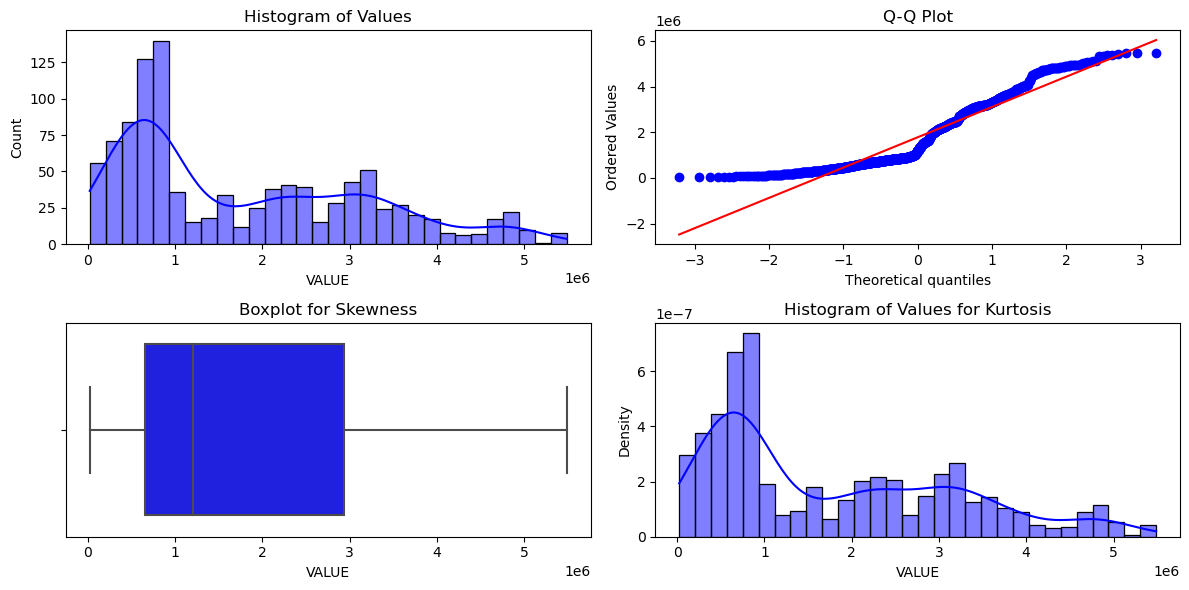

In [17]:
#Creating the plots to show descriptics statistic of VALUE the only numericalvalue in the dataset

from scipy.stats import probplot

# Assuming 'VALUE' is the column you want to check
data_Value = passenger_journeys['VALUE']

# Plot histogram
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(2, 2, 1)
sns.histplot(data_Value, bins=30, kde=True, color='blue')
plt.title('Histogram of Values')

# Probability Plot (Q-Q Plot) for checking normality
plt.subplot(2, 2, 2)
probplot(data_Value, plot=plt)
plt.title('Q-Q Plot')

# Skewness Plot
plt.subplot(2, 2, 3)
sns.boxplot(x=data_Value, color='blue')
plt.title('Boxplot for Skewness')

# Kurtosis Plot
plt.subplot(2, 2, 4)
sns.histplot(data_Value, bins=30, kde=True, stat='density', color='blue')
plt.title('Histogram of Values for Kurtosis')

plt.tight_layout()
plt.show()


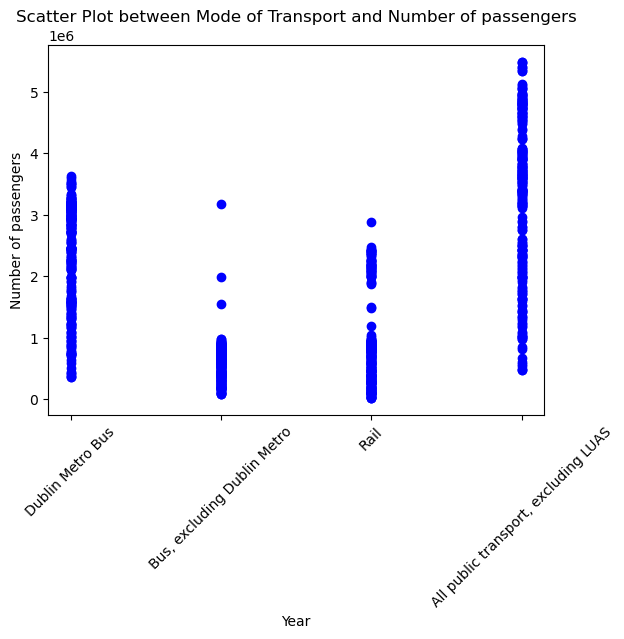

In [18]:
# Showing the relationship between two variables

plt.scatter(x=passenger_journeys['Mode of Transport'], y=passenger_journeys['VALUE'], color='blue')
plt.title('Scatter Plot between Mode of Transport and Number of passengers')
plt.xlabel('Year')
plt.ylabel('Number of passengers')
plt.xticks(rotation=45)
plt.show()

# Inferencial statistics

***Research Question:***
 - Is there a significant difference in the mean number of passenger journeys for Dublin Metro Bus in the years between 2021 and 2022?
 
 **Hypothesis:**

***Null Hypothesis (H0):***
  - The mean number of passenger journeys for Dublin Metro Bus is the same in 2021 and 2022.
  
***Alternative Hypothesis (H1):***
  - The mean number of passenger journeys for Dublin Metro Bus is different in 2021 and 2022.
  
***Select Significance Level (α):*** 0.05

In [19]:
#Check Unique Values for the require columns
print(passenger_journeys['Mode of Transport'].unique())
print(passenger_journeys['Year'].unique())


['Dublin Metro Bus' 'Bus, excluding Dublin Metro' 'Rail'
 'All public transport, excluding LUAS']
[2019 2020 2021 2022 2023]


Text(0.5, 1.0, 'Distribution of VALUE for Dublin Metro Bus')

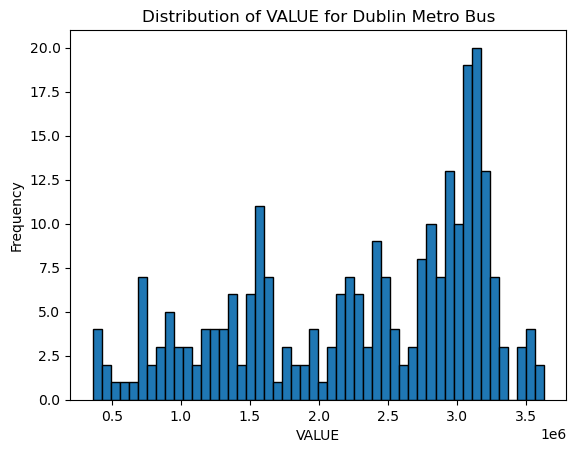

In [20]:
#Investigate Data Distribution > Visualize the distribution of the 'VALUE' column for 'Dublin Metro Bus' across all years 
metro_bus_data = passenger_journeys[passenger_journeys['Mode of Transport'] == 'Dublin Metro Bus']
plt.hist(metro_bus_data['VALUE'], bins=50, edgecolor='black')
plt.xlabel('VALUE')
plt.ylabel('Frequency')
plt.title('Distribution of VALUE for Dublin Metro Bus')

In [21]:
# Filter for mode of transport
Dublin_Metro_bus= passenger_journeys[(passenger_journeys['Mode of Transport'] == 'Dublin Metro Bus')]
Dublin_Metro_bus.head()

,Statistic Label,Week,Mode of Transport,UNIT,VALUE,Year
0,Passenger Journeys,Week 01,Dublin Metro Bus,Number,1987891.0,2019
4,Passenger Journeys,Week 02,Dublin Metro Bus,Number,2709579.0,2019
8,Passenger Journeys,Week 03,Dublin Metro Bus,Number,2784678.0,2019
12,Passenger Journeys,Week 04,Dublin Metro Bus,Number,2858346.0,2019
16,Passenger Journeys,Week 05,Dublin Metro Bus,Number,2924821.0,2019


In [22]:
# filtering years
data_2021 = Dublin_Metro_bus[Dublin_Metro_bus['Year'] == 2021]['VALUE']
data_2022 = Dublin_Metro_bus[Dublin_Metro_bus['Year'] == 2022]['VALUE']

### Perform the Statistical Test:

In [23]:
# Calculate the t-statistic and p-value using the two-sample t-test

from scipy.stats import ttest_ind

# Perform two-sample t-test
t_stat, p_value = ttest_ind(data_2021, data_2022, equal_var=False)

# Set the significance level
alpha = 0.05

# Show the results
print("Two-Sample T-Test Results:")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Make a decision
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")

print("Since the p-value is greater than the chosen significance level of 0.05, there is a failure to reject the null hypothesis.")


Two-Sample T-Test Results:
t-statistic: -11.862335641968993
p-value: 7.997178377956872e-21
Reject the null hypothesis. There is a significant difference.
Since the p-value is greater than the chosen significance level of 0.05, there is a failure to reject the null hypothesis.


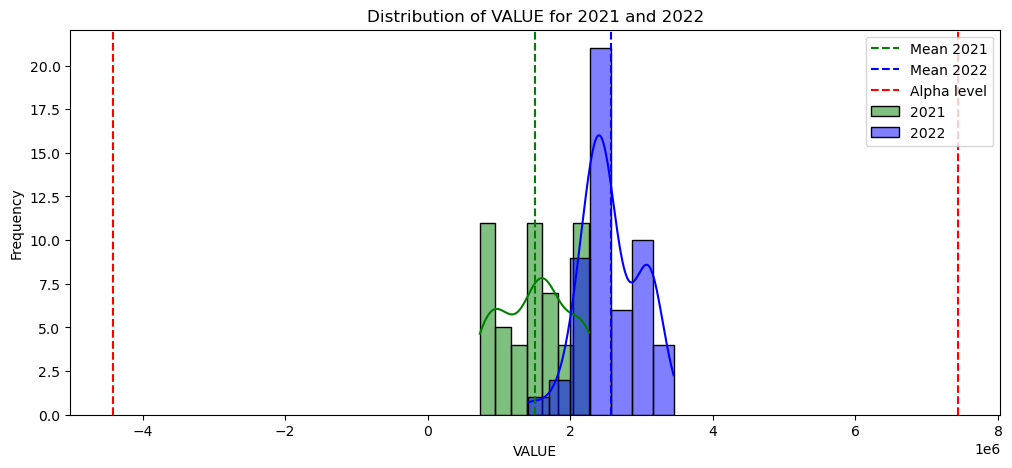

In [24]:
# Plot the distributions
plt.figure(figsize=(12, 5)) 
sns.histplot(data_2021, label='2021', kde=True, color='green', alpha=0.5)
sns.histplot(data_2022, label='2022', kde=True, color='blue', alpha=0.5)

# Highlight the critical region "alpha level".
plt.axvline(x=data_2021.mean(), linestyle='--', color='green', label='Mean 2021')
plt.axvline(x=data_2022.mean(), linestyle='--', color='blue', label='Mean 2022')
plt.axvline(x=data_2021.mean() + (data_2021.std() * t_stat), linestyle='--', color='red', label='Alpha level')
plt.axvline(x=data_2021.mean() - (data_2021.std() * t_stat), linestyle='--', color='red')

# Add legend and labels
plt.legend()
plt.xlabel('VALUE')
plt.ylabel('Frequency')
plt.title('Distribution of VALUE for 2021 and 2022')

# Show the plot
plt.show()

# Public Transport Journeys by Type of Transport London UK

In [25]:
#Add the dataset to analysis data
#Add list with variables to missing values
#Define data type of the column "VALUE" as fload to avoid future issues
# Read the CSV file into a DataFrame

missing_value_formats = ["n.a.","?","NA","n/a", "na", "-"]
Type_of_Transport_london = pd.read_csv("tfl_journeys_type_london.csv" , na_values = missing_value_formats,  dtype={'VALUE': float})

In [26]:
Type_of_Transport_london.head()

,Period and Financial year,Reporting Period,Days in period,Period beginning,Period ending,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),London Cable Car Journeys (m),TfL Rail Journeys (m)
0,01_10/11,1,31,01-Apr-10,01-May-10,189.1,90.5,6.3,2.3,NaN,NaN,NaN
1,02_10/11,2,28,02-May-10,29-May-10,181.6,84.5,5.8,2.2,NaN,NaN,NaN
2,03_10/11,3,28,30-May-10,26-Jun-10,175.9,84.3,5.8,2.1,NaN,NaN,NaN
3,04_10/11,4,28,27-Jun-10,24-Jul-10,183.4,86.5,6.1,2.1,NaN,NaN,NaN
4,05_10/11,5,28,25-Jul-10,21-Aug-10,160.4,82.9,5.8,2.0,NaN,NaN,NaN


# Exploratory Data Analysis

In [27]:
Type_of_Transport_london.describe()

,Reporting Period,Days in period,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),London Cable Car Journeys (m),TfL Rail Journeys (m)
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,170.000000,148.000000,111.000000
mean,6.887006,28.084746,159.251412,88.789831,7.600000,1.993220,11.365294,0.110135,5.185586
std,3.735381,0.655955,35.217372,24.040373,1.890076,0.460557,3.491889,0.059178,4.074128
min,1.000000,26.000000,30.200000,5.700000,1.200000,0.400000,1.000000,0.000000,0.600000
25%,4.000000,28.000000,145.100000,84.500000,6.500000,1.700000,8.925000,0.100000,3.250000
50%,7.000000,28.000000,173.700000,94.100000,7.700000,2.200000,11.600000,0.100000,3.800000
75%,10.000000,28.000000,182.500000,105.300000,9.200000,2.300000,14.375000,0.100000,4.600000
max,13.000000,31.000000,207.500000,118.200000,10.600000,2.800000,17.800000,0.500000,17.800000


In [28]:
Type_of_Transport_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Period and Financial year      177 non-null    object 
 1   Reporting Period               177 non-null    int64  
 2   Days in period                 177 non-null    int64  
 3   Period beginning               177 non-null    object 
 4   Period ending                  177 non-null    object 
 5   Bus journeys (m)               177 non-null    float64
 6   Underground journeys (m)       177 non-null    float64
 7   DLR Journeys (m)               177 non-null    float64
 8   Tram Journeys (m)              177 non-null    float64
 9   Overground Journeys (m)        170 non-null    float64
 10  London Cable Car Journeys (m)  148 non-null    float64
 11  TfL Rail Journeys (m)          111 non-null    float64
dtypes: float64(7), int64(2), object(3)
memory usage: 1

In [29]:
#Check the 5 first rows of the dataset
Type_of_Transport_london.shape

(177, 12)

# Data Preparation

In [30]:
# Convert 'Period beginning' and 'Period ending' columns to datetime
Type_of_Transport_london['Period beginning'] = pd.to_datetime(Type_of_Transport_london['Period beginning'])
Type_of_Transport_london['Period ending'] = pd.to_datetime(Type_of_Transport_london['Period ending'])

# Extract the year and create a new column
Type_of_Transport_london['Year'] = Type_of_Transport_london['Period ending'].dt.year
Type_of_Transport_london['Year'] = Type_of_Transport_london['Year'].astype(str).str[:4]

# Select data only for the years 2019, 2020, 2021, 2022, and 2023
selected_years = [2019, 2020, 2021, 2022, 2023]
Type_of_Transport_london = Type_of_Transport_london[
    (Type_of_Transport_london['Period beginning'].dt.year.isin(selected_years)) |
    (Type_of_Transport_london['Period ending'].dt.year.isin(selected_years))
]

# Print the filtered DataFrame
Type_of_Transport_london.head()

,Period and Financial year,Reporting Period,Days in period,Period beginning,Period ending,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),London Cable Car Journeys (m),TfL Rail Journeys (m),Year
113,10_18/19,10,28,2018-12-09,2019-01-05,144.9,91.9,7.5,1.9,11.6,0.1,3.9,2019
114,11_18/19,11,28,2019-01-06,2019-02-02,171.3,106.7,9.3,2.2,14.5,0.1,4.6,2019
115,12_18/19,12,28,2019-02-03,2019-03-02,171.3,110.8,9.7,2.2,14.4,0.1,4.4,2019
116,13_18/19,13,29,2019-03-03,2019-03-31,182.7,114.1,10.0,2.2,15.7,0.1,4.3,2019
117,01_19/20,1,28,2019-04-01,2019-04-27,156.6,101.2,8.9,2.0,13.9,0.1,4.3,2019


In [31]:
Type_of_Transport_london_melt = Type_of_Transport_london.melt(
    id_vars=["Year", "Period and Financial year", "Reporting Period", "Days in period", "Period beginning", "Period ending"],
    var_name="Mode of Transport",
    value_name="Value_in_millions"
)

Type_of_Transport_london_melt.head(10)

,Year,Period and Financial year,Reporting Period,Days in period,Period beginning,Period ending,Mode of Transport,Value_in_millions
0,2019,10_18/19,10,28,2018-12-09,2019-01-05,Bus journeys (m),144.9
1,2019,11_18/19,11,28,2019-01-06,2019-02-02,Bus journeys (m),171.3
2,2019,12_18/19,12,28,2019-02-03,2019-03-02,Bus journeys (m),171.3
3,2019,13_18/19,13,29,2019-03-03,2019-03-31,Bus journeys (m),182.7
4,2019,01_19/20,1,28,2019-04-01,2019-04-27,Bus journeys (m),156.6
5,2019,02_19/20,2,28,2019-04-28,2019-05-25,Bus journeys (m),175.2
6,2019,03_19/20,3,28,2019-05-26,2019-06-22,Bus journeys (m),171.4
7,2019,04_19/20,4,28,2019-06-23,2019-07-20,Bus journeys (m),177.0
8,2019,05_19/20,5,28,2019-07-21,2019-08-17,Bus journeys (m),149.8
9,2019,06_19/20,6,28,2019-08-18,2019-09-14,Bus journeys (m),159.8


## Handling Missing values and cleaning data

In [32]:
#Checking null values
Type_of_Transport_london_melt.isnull().sum()

Year                         0
Period and Financial year    0
Reporting Period             0
Days in period               0
Period beginning             0
Period ending                0
Mode of Transport            0
Value_in_millions            0
dtype: int64

Text(0.5, 1.0, 'Feature Statistics')

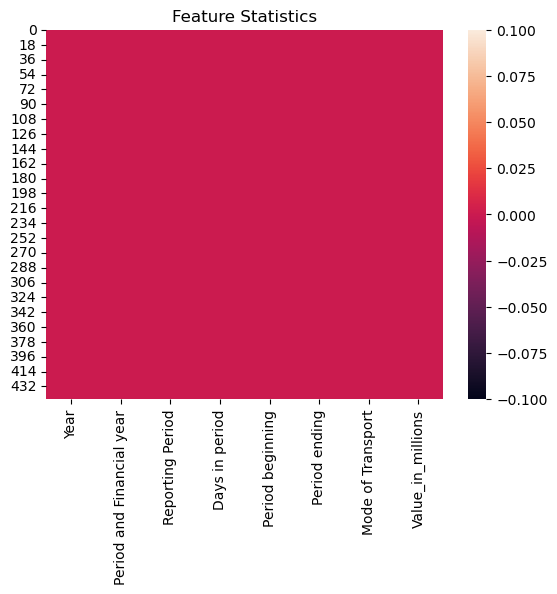

In [33]:
#This heatmap will show a visual representation of the missing value in the dataset
#It is posible to observe there is only one column with missing values = VALUE 
sns.heatmap(Type_of_Transport_london_melt.isnull())
plt.title("Feature Statistics")

# Descriptive statistics

In [34]:
mean_value = Type_of_Transport_london_melt['Value_in_millions'].mean()
median_value =Type_of_Transport_london_melt['Value_in_millions'].median()
mode_value = Type_of_Transport_london_melt['Value_in_millions'].mode().iloc[0]
std_dev =Type_of_Transport_london_melt['Value_in_millions'].std()
data_range =Type_of_Transport_london_melt['Value_in_millions'].max() -passenger_journeys['VALUE'].min()
q1 = Type_of_Transport_london_melt['Value_in_millions'].quantile(0.25)
q3 =Type_of_Transport_london_melt['Value_in_millions'].quantile(0.75)
cv = (std_dev / mean_value) * 100

print("Mean:", mean_value)
print("Median:", median_value)
print("Mode:", mode_value)
print("Standard Deviation:", std_dev)
print("Range:", data_range)
print("Q1:", q1)
print("Q3:", q3)
print("Coefficient of Variation:", cv)


Mean: 31.93325892857143
Median: 7.35
Mode: 0.1
Standard Deviation: 48.71237719783241
Range: -23048.3
Q1: 1.6
Q3: 40.25
Coefficient of Variation: 152.54433412760233


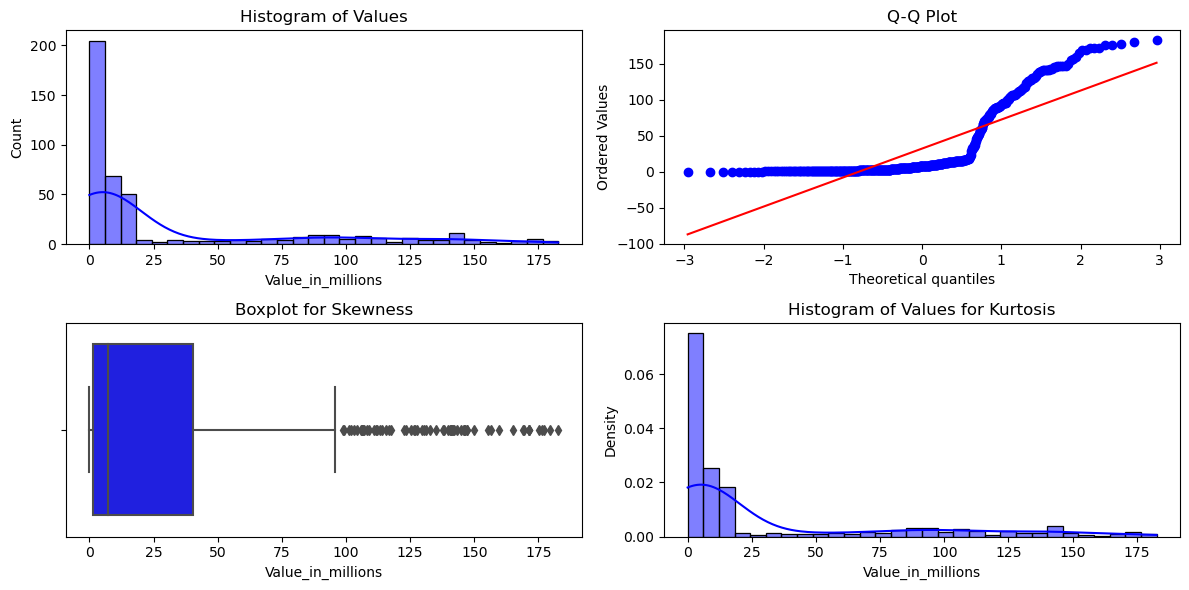

In [35]:
#Creating the plots to show descriptics statistic of VALUE the only numericalvalue in the dataset

from scipy.stats import probplot

# Assuming 'VALUE' is the column you want to check
data_Value = Type_of_Transport_london_melt['Value_in_millions']

# Plot histogram
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(2, 2, 1)
sns.histplot(data_Value, bins=30, kde=True, color='blue')
plt.title('Histogram of Values')

# Probability Plot (Q-Q Plot) for checking normality
plt.subplot(2, 2, 2)
probplot(data_Value, plot=plt )
plt.title('Q-Q Plot')

# Skewness Plot
plt.subplot(2, 2, 3)
sns.boxplot(x=data_Value, color='blue')
plt.title('Boxplot for Skewness')

# Kurtosis Plot
plt.subplot(2, 2, 4)
sns.histplot(data_Value, bins=30, kde=True, stat='density', color='blue')
plt.title('Histogram of Values for Kurtosis')

plt.tight_layout()
plt.show()

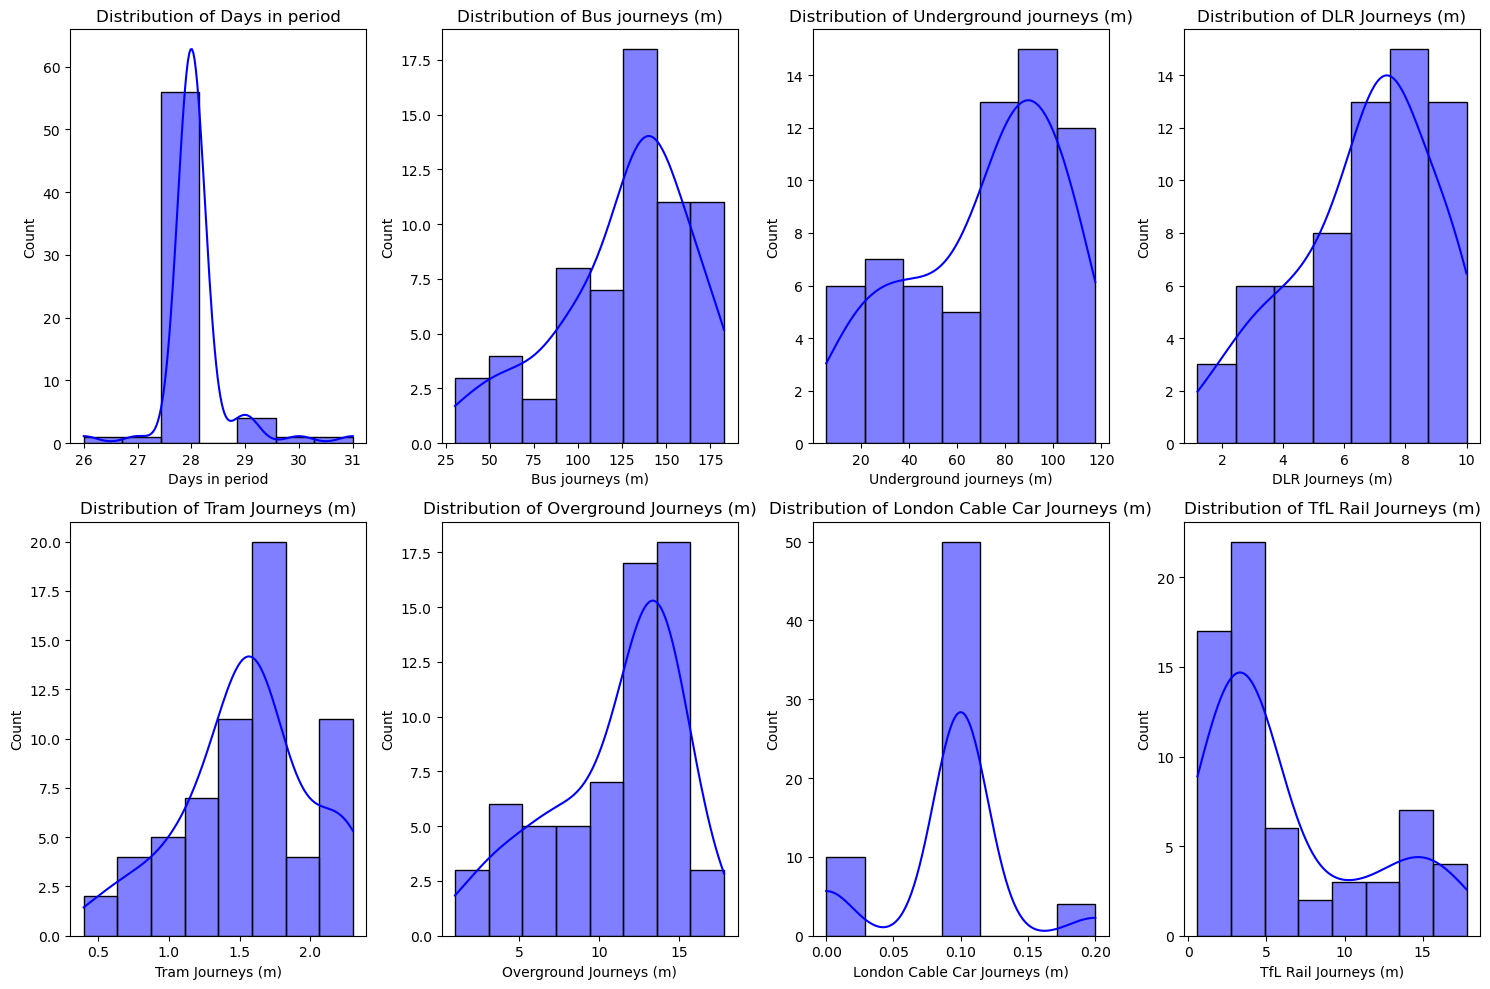

In [36]:
# Select specific columns for distribution plots
selected_columns = [ 'Days in period', 'Bus journeys (m)', 
                     'Underground journeys (m)', 'DLR Journeys (m)',
                     'Tram Journeys (m)', 'Overground Journeys (m)',
                     'London Cable Car Journeys (m)', 'TfL Rail Journeys (m)']
# Set up subplots with two rows
fig, axes = plt.subplots(nrows=2, ncols=len(selected_columns) // 2 , figsize=(15, 10))

# Flatten the 2D array of subplots
axes = axes.flatten()

# Create distribution plots for each selected column
for i, column in enumerate(selected_columns):
    sns.histplot(Type_of_Transport_london[column], kde=True, ax=axes[i], color="blue")
    axes[i].set_title(f'Distribution of {column}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

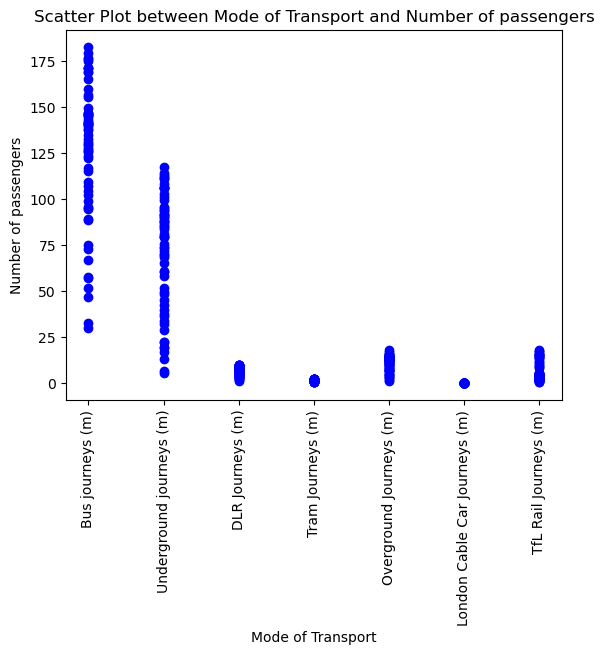

In [37]:
# Showing the relationship between two variables

plt.scatter(x=Type_of_Transport_london_melt["Mode of Transport"], y=Type_of_Transport_london_melt['Value_in_millions'], color='blue')
plt.title('Scatter Plot between Mode of Transport and Number of passengers')
plt.xlabel('Mode of Transport')
plt.ylabel('Number of passengers')
plt.xticks(rotation=90)
plt.show()

# Inferencial statistics

***Research Question:***
 - Is there a significant difference in the mean number of passenger journeys for London Bus journeys (m) in the years between 2021 and 2022?
 
 **Hypothesis:**

***Null Hypothesis (H0):***
  - The mean number of passenger journeys for London Bus journeys (m) is the same in 2021 and 2022.
  
***Alternative Hypothesis (H1):***
  - The mean number of passenger journeys for London Bus journeys (m) is different in 2021 and 2022.
  
***Select Significance Level (α):*** 0.05

Text(0.5, 1.0, 'Distribution of VALUE for Bus journeys (m)')

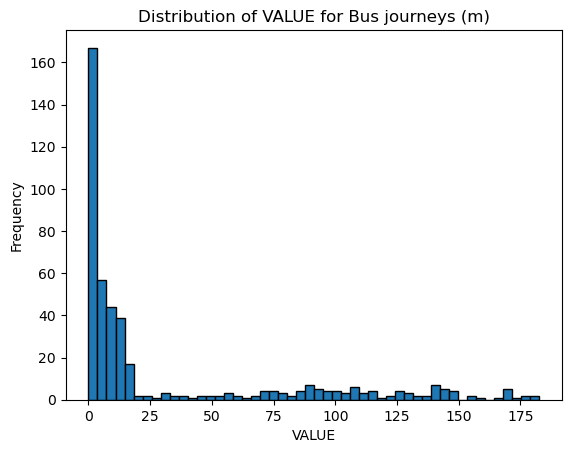

In [38]:
bus_data = Type_of_Transport_london_melt[Type_of_Transport_london_melt['Mode of Transport'] == 'Bus journeys (m)']
plt.hist(Type_of_Transport_london_melt['Value_in_millions'], bins=50, edgecolor='black')
plt.xlabel('VALUE')
plt.ylabel('Frequency')
plt.title('Distribution of VALUE for Bus journeys (m)')

In [39]:
# change Year from object to numerical
# Assuming your DataFrame is named 'passenger_journeys'
Type_of_Transport_london_melt ['Year'] = pd.to_datetime(Type_of_Transport_london_melt ['Year'], format='%Y')
Type_of_Transport_london_melt ['Year'] =Type_of_Transport_london_melt ['Year'].dt.year.astype(int)

# Filter for mode of transport
London_bus = Type_of_Transport_london_melt [Type_of_Transport_london_melt ['Mode of Transport'] == 'Bus journeys (m)'] 


# Display the updated DataFrame
passenger_journeys.head()


# Print or further analyze the filtered DataFrame
London_bus.tail()

,Year,Period and Financial year,Reporting Period,Days in period,Period beginning,Period ending,Mode of Transport,Value_in_millions
59,2023,04_23/24,4,28,2023-06-25,2023-07-22,Bus journeys (m),147.1
60,2023,05_23/24,5,28,2023-07-23,2023-08-19,Bus journeys (m),129.7
61,2023,06_23/24,6,28,2023-08-20,2023-09-16,Bus journeys (m),139.6
62,2023,07_23/24,7,28,2023-09-17,2023-10-14,Bus journeys (m),155.4
63,2023,08_23/24,8,28,2023-10-15,2023-11-11,Bus journeys (m),146.4


In [40]:
# filtering years
data_2021 = Type_of_Transport_london_melt[Type_of_Transport_london_melt ['Year'] == 2021]['Value_in_millions']
data_2022 =Type_of_Transport_london_melt[Type_of_Transport_london_melt ['Year'] == 2022]['Value_in_millions']

### Perform the Statistical Test:

In [41]:
# Calculate the t-statistic and p-value using the two-sample t-test

from scipy.stats import ttest_ind

# Perform two-sample t-test
t_stat, p_value = ttest_ind(data_2021, data_2022, equal_var=False)

# Set the significance level
alpha = 0.05

# Show the results
print("Two-Sample T-Test Results:")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Make a decision
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")

print("Since the p-value is greater than the chosen significance level of 0.05, there is a failure to reject the null hypothesis.")


Two-Sample T-Test Results:
t-statistic: -1.7364985636604018
p-value: 0.08431385403080836
Fail to reject the null hypothesis. No significant difference.
Since the p-value is greater than the chosen significance level of 0.05, there is a failure to reject the null hypothesis.


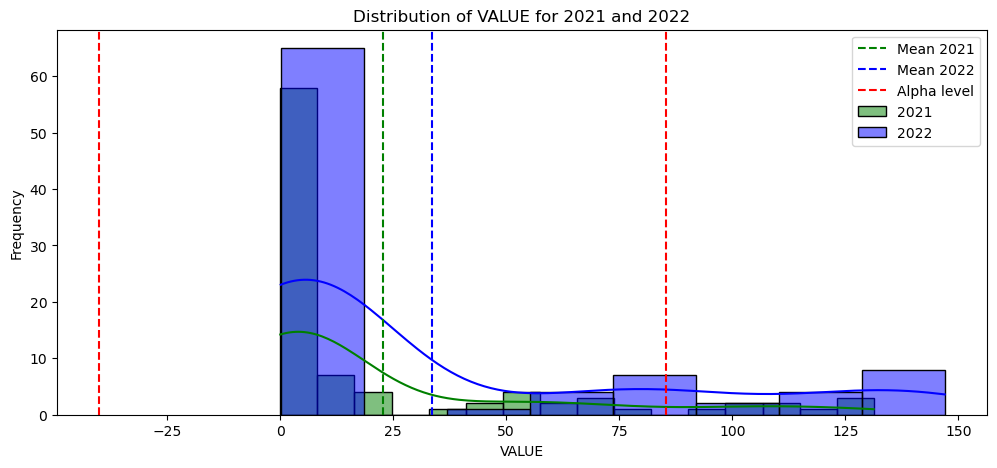

In [42]:
# Plot the distributions
plt.figure(figsize=(12, 5)) 
sns.histplot(data_2021, label='2021', kde=True, color='green', alpha=0.5)
sns.histplot(data_2022, label='2022', kde=True, color='blue', alpha=0.5)

# Highlight the critical region "alpha level".
plt.axvline(x=data_2021.mean(), linestyle='--', color='green', label='Mean 2021')
plt.axvline(x=data_2022.mean(), linestyle='--', color='blue', label='Mean 2022')
plt.axvline(x=data_2021.mean() + (data_2021.std() * t_stat), linestyle='--', color='red', label='Alpha level')
plt.axvline(x=data_2021.mean() - (data_2021.std() * t_stat), linestyle='--', color='red')

# Add legend and labels
plt.legend()
plt.xlabel('VALUE')
plt.ylabel('Frequency')
plt.title('Distribution of VALUE for 2021 and 2022')

# Show the plot
plt.show()

**t-statistic:** The t-statistic measures the difference between the means of the two samples relative to the variation within each sample. In this case, the negative value indicates that the mean number of passenger journeys for London Bus journeys (m) in 2021 is slightly lower than in 2022.

**p-value:** The p-value is the probability of observing a t-statistic as extreme as the one calculated, assuming that the null hypothesis is true. In this case, the p-value is 0.0843, which is greater than the chosen significance level of 0.05.

**Conclusion:**

Since the p-value is greater than the significance level (α = 0.05), we fail to reject the null hypothesis. There is not enough evidence to conclude that the mean number of passenger journeys for London Bus journeys (m) is significantly different in 2021 and 2022. The observed difference could be due to random variation.

Null Hypothesis (H0): Accepted